In [1]:
import numpy as np
import h5py

model_name = 'neuronal_model_491766131'

im_file_name = 'lfp_result/' + model_name + '_Im.h5'
with h5py.File(im_file_name, 'r') as hf:
    dt = hf.attrs['dt']
    im = hf['data'][()]
    seg_coords = {}
    for key in hf['seg_coords']:
        seg_coords[key] = hf['seg_coords'][key][()]

morph_file_name = 'lfp_result/' + model_name + '_SegProp.h5'
with h5py.File(morph_file_name, 'r') as hf:
    seg_prop = {}
    for key in hf['seg_prop']:
        seg_prop[key] = hf['seg_prop'][key][()]

In [2]:
tstart = 10
dur = 7
t = dt * np.arange(im.shape[1])
t_idx = (t>=tstart) & (t<=tstart+dur)
t = t[t_idx]
im = im[:,t_idx] # nA
# im_den = im / np.expand_dims(seg_prop['seg_area'], 1) # nA/um^2
im_den = im / np.diff(seg_prop['distance'], axis=1) # nA/um

select_seg = None #seg_coords['pc'][:,0] > -50
# select_seg = seg_prop['swc_type'] != 1 # excluding soma

var = im_den
varname = 'Transmembrane current density per unit length (nA/um)'
n_dist = 10
max_per_dist = 2
space = 0.01
normalized_space = False
sort_by_dist = True
figsize = (12,9)
fontsize = 15
scalebar_size = 50

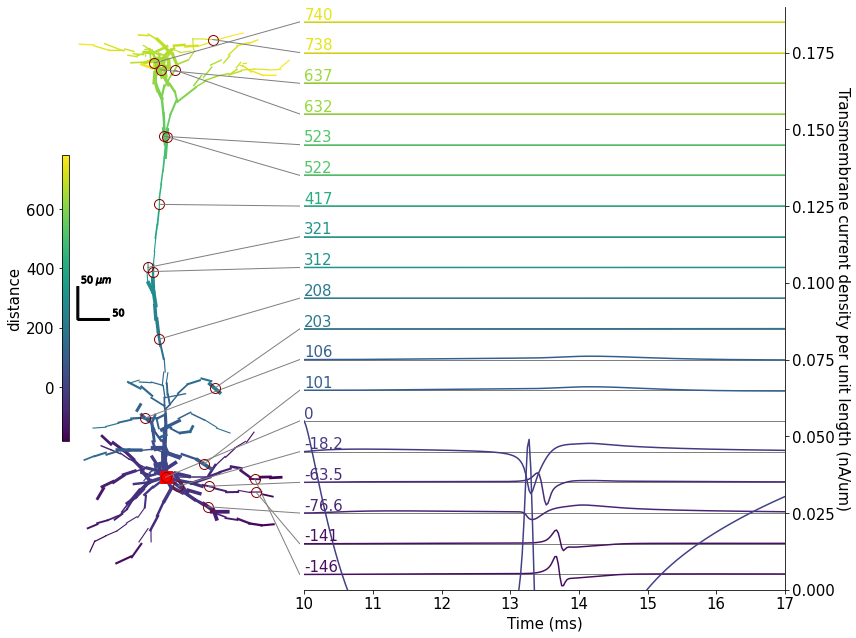

In [3]:
from utils.plotting.plot_variable_with_morphology import plot_variable_with_morphology
%matplotlib inline

_ = plot_variable_with_morphology(seg_coords, seg_prop, var, t=t,
                                  distance_type='distance', n_dist=n_dist,
                                  select_seg=select_seg, max_per_dist=max_per_dist, varname=varname,
                                  space=space, normalized_space=normalized_space, sort_by_dist=sort_by_dist,
                                  figsize=figsize, fontsize=fontsize, scalebar_size=scalebar_size)

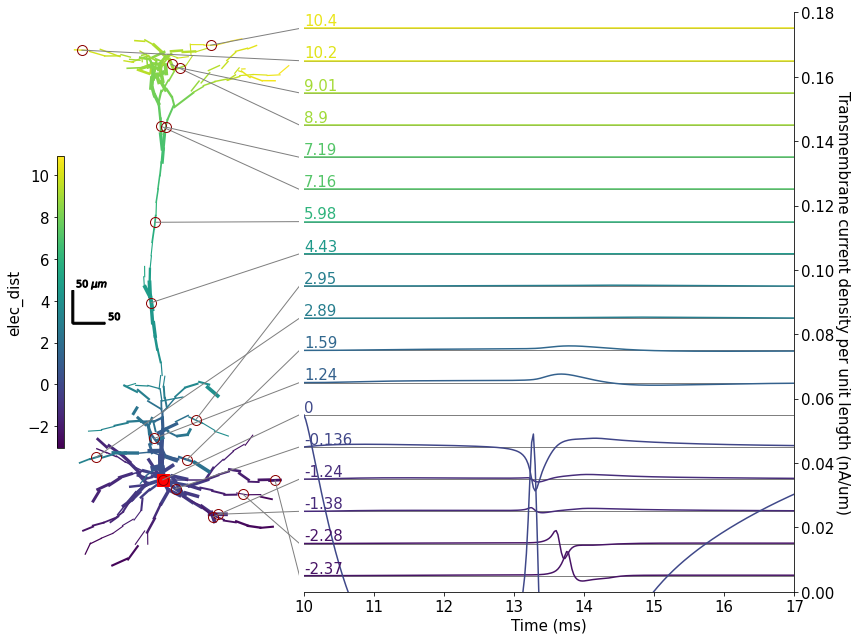

In [4]:
_ = plot_variable_with_morphology(seg_coords, seg_prop, var, t=t,
                                  distance_type='elec_dist', n_dist=n_dist,
                                  select_seg=select_seg, max_per_dist=max_per_dist, varname=varname,
                                  space=space, normalized_space=normalized_space, sort_by_dist=sort_by_dist,
                                  figsize=figsize, fontsize=fontsize, scalebar_size=scalebar_size)